#### Basic concepts of python
key concepts to learn python:
1. Data types and variables: In this data types and variables we learn such as integers, floats, strings, and booleans.
2. Control structure: Here we learn the loops such as if, elif, else, for, while.
3. Functions and Libraries: Here we learn about how to understand the library and implement, define to call the function, learn about the arguments and return values.
4. Data Handling with Numpy and Pandas: NumPy is used for mathematical operations, data manipulations to sort out the arrays, etc. Panda is great for structured data operations and manipulations, which is also ideal for tables of time series.

#### Hands on experience with Python ML
Let's write some Python code. We'll start with a simple task: creating a function that calculates the mean, median, and standard deviation of a list of numbers using NumPy

In [11]:
import numpy as np

def calculate_stats(numbers):
    mean = np.mean(numbers)
    median = np.median(numbers)
    std_dev = np.std(numbers)
    return mean, median, std_dev

numbers = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
mean, median, std_dev = calculate_stats(numbers)
print(f"Mean: {mean}, Median: {median}, Standard Deviation: {std_dev}")


Mean: 52.5, Median: 52.5, Standard Deviation: 28.83140648667699


#### Moving on to Step 2: Introduction to Machine Learning Concepts:
### Key Concepts to Learn:

1. Types of Machine Learning: Understand the differences between supervised, unsupervised, and reinforcement learning.
2. Basic Terminology: Learn about features, target variables, training sets, test sets, model fitting, and predictions.
3. Evaluation Metrics: Familiarize yourself with metrics like accuracy, precision, recall (for classification problems) and mean squared error, mean absolute error (for regression problems).

Hands-on Exercise:
Let's explore the Iris dataset, a classic dataset in machine learning. You can use Scikit-learn to load the dataset, which features measurements of iris flowers and their species.

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=43)

# Explore the dataset
print("Features:", iris.feature_names)
print("First 5 samples:\n", X_train[:5])
print("First 5 labels:", y_train[:5])

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
First 5 samples:
 [[6.  3.  4.8 1.8]
 [5.8 2.7 4.1 1. ]
 [7.6 3.  6.6 2.1]
 [5.1 3.4 1.5 0.2]
 [5.7 2.5 5.  2. ]]
First 5 labels: [2 1 2 0 2]


### Exploratory Data Analysis (EDA)
In machine learning, understanding your data is crucial. EDA is the process used to explore datasets to find relationships, anomalies, patterns, or trends. This step is critical before moving on to actual model building.

### Key Concepts to Learn:

1. Summary Statistics: Mean, median, mode, variance, and standard deviation.
2. Data Visualization: Using Matplotlib and Seaborn for plotting histograms, box plots, scatter plots, and more.
3. Correlation Analysis: Finding the relationships between variables.

Hands-on Exercise:
Perform EDA on the Titanic dataset. We will visualize the age distribution and investigate the correlation between 'Fare' and 'Survived' status.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


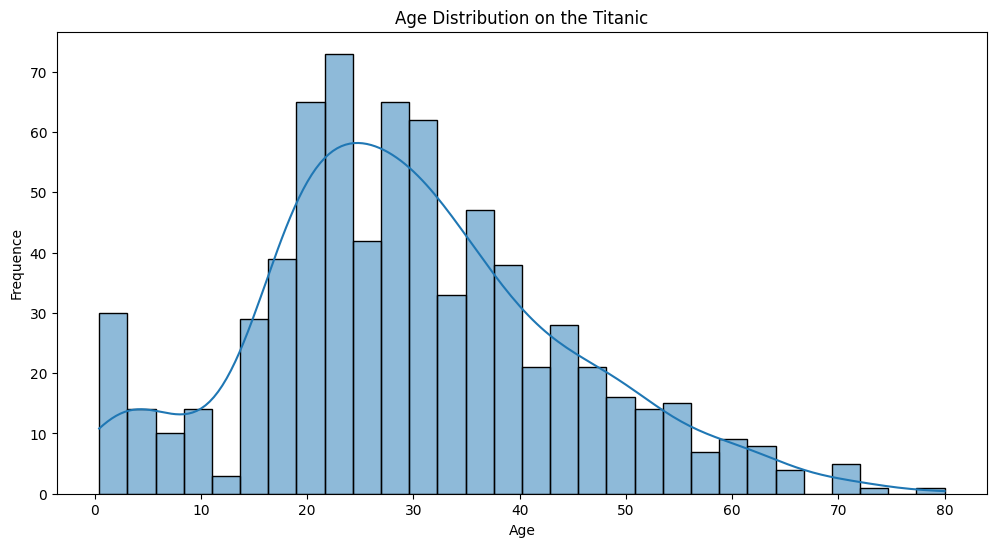

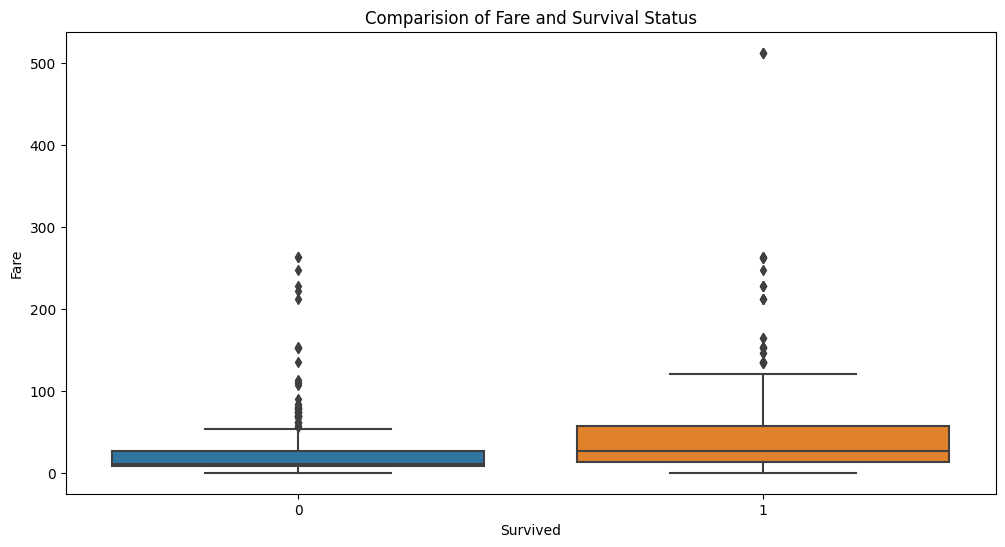

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
titanic = sns.load_dataset('titanic')


#summary statistics for 'Age' column
print(titanic['age'].describe())

#plotting the age distribution
plt.figure(figsize=(12, 6))
sns.histplot(titanic['age'], kde=True, bins=30)
plt.title('Age Distribution on the Titanic')
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

#Corellation between 'Fare' and 'Survived Status' 
plt.figure(figsize=(12, 6))
sns.boxplot(x='survived', y='fare', data=titanic)
plt.title('Comparision of Fare and Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

## Data Processing 
Data processing is a critical step in the machine learning pipeline. Before we feed data into a machine learning model, we need to clean and prepare it to improve the model's performance.

### Key concepts to learn in this:

1. Hnadling Missing values: We can fill missing values with a specific number, the mean/ mode/median of the column, or use more sophisticated methods like interpolation or using models to predict missing values. 
2. Encoding Catergorical data: Machine learning model typically require numerical input, so categorical data must be conversted into numerical format. Common techniques include label encoding and one-hot encoding. 
3. Feature Scaling: This include standardization( scaling to have zero meand and unit variance) and normalization (scaling to have between 0 and 1). This is important for models that are sensetive to the scale of data like SVM's and k-NN.
4. Data spliting: Data split into training and testing sets to evaluate the performance of the model. The traning set is used to train the model, while the test set is used to test its generalization to unseen data.

Hands on practice: Practice with the titanic data

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#load the dataset
titanic = sns.load_dataset('titanic')

#select the feature and target variable for simplicity
features = ['pclass', 'sex', 'age', 'fare']
X = titanic[features].copy()
y = titanic['survived']

#Handling the missing data
imputer = SimpleImputer(strategy='mean')
X.loc[:,'age'] = imputer.fit_transform(X[['age']])

#Encodin the categorical data
X = pd.get_dummies(X, columns=['sex'], drop_first=True)

#Feature scaling
scaler = StandardScaler()
X['fare'] = scaler.fit_transform(X[['fare']])

#Data spliting
X_test, X_train, y_test, y_train = train_test_split(X, y , test_size=0.3, random_state=42)

#print the first 5 rows of the processed data
print(X_train.head(15))

     pclass        age      fare  sex_male
709       3  29.699118 -0.341452      True
439       2  31.000000 -0.437007      True
840       3  20.000000 -0.488854      True
720       2   6.000000  0.016023     False
39        3  14.000000 -0.422074     False
290       1  26.000000  0.939198     False
300       3  29.699118 -0.492378     False
333       3  16.000000 -0.285997      True
208       3  16.000000 -0.492378     False
136       1  19.000000 -0.119216     False
137       1  37.000000  0.420730      True
696       3  44.000000 -0.486337      True
485       3  29.699118 -0.135658     False
244       3  30.000000 -0.502949      True
344       2  36.000000 -0.386671      True


## Building Machine Learning Model 
After Preprocessing your data, the next step is to select and apply machine learning to build models that can learn from your data

### Key concepts to apply and learn:
1. Choosing a model: The choice of model depends on the typs of the problem(classification, regression, clustering, etc) and the nature of data.
2. Traning the Model: This involves feeding the traning data into the model and allowing it to learn the relationships between features and the target outcomes.
3. Model evaluation: Using the test data, evaluate how well the model had learned by predicting the outcomes and comparing to the actual results.

Hands on experience: Here we move on with the same titanic dataset and for simplicity we will build a logistice regression model( a common algorithm for BINARY CLASSIFICATION PROBLEM)
using this titanic dataset to predict weather a passenger survived(1) or did not survive(0).

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#Initalize the model
model = LogisticRegression()

#Train the model
model.fit(X_train, y_train)

#Make prediction on the test set
predictions = model.predict(X_test)

#Evaluate the model 
accuracy  = accuracy_score(y_test, predictions)
confusion_matrix = confusion_matrix(y_test, predictions)

print(f"Model accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_matrix}")

Model accuracy: 0.78330658105939
Confusion Matrix:
[[317  75]
 [ 60 171]]


Practice:

1. Try using different machine learning models like Decision Trees, K-Nearest Neighbors, or Support Vector Machines, and compare their performance.
2. Experiment with different features and preprocessing steps to see how they affect the model's accuracy.

In [33]:
#Decision Trees

from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Model Accuracy: {dt_accuracy}")

Decision Tree Model Accuracy: 0.7174959871589085


In [41]:
#K-NN

from sklearn.neighbors import KNeighborsClassifier

#Initalize the model
Knn_model = KNeighborsClassifier(n_neighbors=5)

#Train the model
Knn_model.fit(X_train, y_train)

#Make prediction on the test size
Knn_prediction = Knn_model.predict(X_test)

#Evaluate the model
Knn_accuracy = accuracy_score(y_test, Knn_prediction)
print(f"KNN Model Accuracy: {Knn_accuracy}")


KNN Model Accuracy: 0.7126805778491172


In [42]:
# Support Vector Machines (SVM)

from sklearn.svm import SVC

#Initalize the model 
svm_model = SVC()

#Train the model
svm_model.fit(X_train, y_train)

#Make prediction on the test set
svm_predictions = svm_model.predict(X_test)

##Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"Support Vector Machines: {svm_accuracy}")

Support Vector Machines: 0.6548956661316212


In [43]:
#Comparing all the models performance 
print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Decision Tree Model Accuracy: {dt_accuracy}")
print(f"KNN Model Accuracy: {Knn_accuracy}")
print(f"SVM Model Accuracy: {svm_accuracy}")


Logistic Regression Accuracy: 0.78330658105939
Decision Tree Model Accuracy: 0.7174959871589085
KNN Model Accuracy: 0.7126805778491172
SVM Model Accuracy: 0.6548956661316212


In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

#considering Logestic regression since it has more accuracy 
lr_precision = precision_score(y_test, predictions)
lr_recall = recall_score(y_test, predictions)
lr_f1 = f1_score(y_test, predictions)

print(f"Logistic Regression Precision: {lr_precision}")
print(f"Logistic Regression Recall: {lr_recall}")
print(f"Logistic Regression f1 Score: {lr_f1}")

Logistic Regression Precision: 0.6951219512195121
Logistic Regression Recall: 0.7402597402597403
Logistic Regression f1 Score: 0.7169811320754716


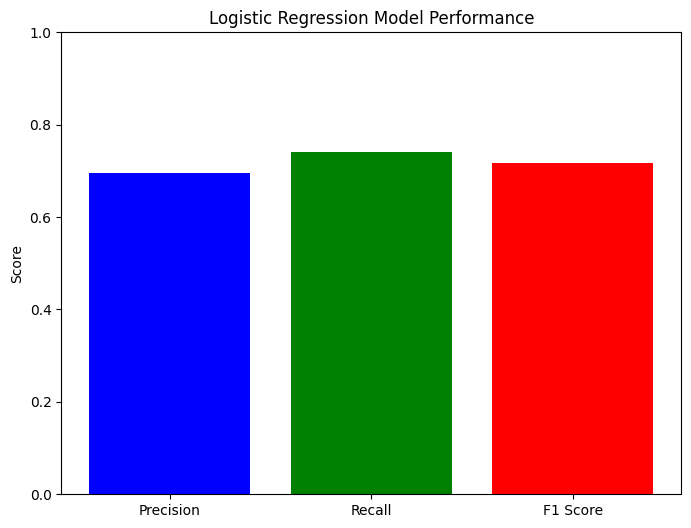

In [45]:
import matplotlib.pyplot as plt

# Metrics for Logistic Regression
metrics = ['Precision', 'Recall', 'F1 Score']
values = [0.6951219512195121, 0.7402597402597403, 0.7169811320754716]

# Creating the bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(metrics, values, color=['blue', 'green', 'red'])  # Plot the bar chart

# Adding title and labels
plt.title('Logistic Regression Model Performance')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set the y-axis range to be from 0 to 1

# Display the plot
plt.show()


### Model Improvement and Tuning
Once you have a baseline model, the next step is to improve its performance. This can involve several strategies:

### Key Concepts to Learn:

1. Feature Engineering: This involves creating new features or modifying existing ones to make them more informative for the model. This could include combining features, creating polynomial features, or transforming variables.
2. Hyperparameter Tuning: Most machine learning algorithms have settings called hyperparameters that can be adjusted. Finding the optimal combination of hyperparameters can significantly improve model performance.
3. Cross-Validation: This technique involves splitting the training data into several smaller sets (folds) to validate the model multiple times. It provides a more reliable estimate of model performance.
4. Ensemble Methods: Combining multiple models can often produce a more powerful model. Techniques like Bagging, Boosting, and Stacking are common ensemble methods.

Hands-on Exercise:
Let’s try hyperparameter tuning on the Decision Tree model using GridSearchCV:

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test set
best_dt = grid_search.best_estimator_
best_dt_predictions = best_dt.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, best_dt_predictions))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.8206149545772188
Test Accuracy: 0.7736757624398074


### Model Deployment
Once you have a satisfactory model, the final step is deploying it for real-world use. This involves integrating the model into a production environment where it can take new input data, make predictions, and provide value.

### Key Concepts to Learn:

1. Exporting the Model: Saving the trained model to a file.
2. Integration: Incorporating the model into existing production environments.
3. Monitoring and Maintenance: Regularly checking the model's performance and updating it as necessary.

Hands-on Exercise:
Here’s how you could export and load your trained model using joblib:

In [47]:
from joblib import dump, load

# Export the model
dump(best_dt, 'best_decision_tree.joblib')

# Later on, in another environment or application, you can load the model
loaded_dt = load('best_decision_tree.joblib')

# Use the loaded model to make predictions
loaded_dt_predictions = loaded_dt.predict(X_test)